<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/Naman_Garg_iGnosis_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **iGnosis Tech**
Our (hypothetical) marketing department needs some help in focussing on the most important market segment. Instead of marketing to everyone, they need our help in identifying who our most profitable customers are. Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.

Also, they need help in identifying the bestselling products.

So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers.  Also include your hypothesis of why you think the loyal customers like

In [284]:
import numpy as np
import pandas as pd

transact_data = pd.read_csv("transaction_data.csv")
purchase_data = pd.read_csv("purchase_behaviour.csv")
transact_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [285]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [286]:
df = transact_data.merge(purchase_data,on="LYLTY_CARD_NBR")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [287]:
df.shape

(264836, 10)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [289]:
df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [290]:
df.duplicated().sum()

1

In [291]:
df.drop_duplicates(inplace=True)

In [292]:
df.shape

(264835, 10)

In [294]:
customer_segment_grp = df.groupby(by=["LIFESTAGE","PREMIUM_CUSTOMER"]).aggregate({"TOT_SALES":"mean"})
customer_segment_grp.reset_index(inplace=True)

In [295]:
customer_segment_grp.sort_values(by="TOT_SALES",inplace=True,ascending=False)
customer_segment_grp.reset_index(drop=True,inplace=True)

In [304]:
customer_segment_grp

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Mainstream,7.647284
1,YOUNG SINGLES/COUPLES,Mainstream,7.558339
2,RETIREES,Premium,7.456174
3,OLDER SINGLES/COUPLES,Premium,7.449848
4,RETIREES,Budget,7.443445
5,OLDER SINGLES/COUPLES,Budget,7.430315
6,OLDER FAMILIES,Premium,7.322945
7,NEW FAMILIES,Mainstream,7.317806
8,NEW FAMILIES,Budget,7.297321
9,YOUNG FAMILIES,Budget,7.287201


**Insight:**

Top 3 profitable segments are:

1. MIDAGE SINGLES/COUPLES	Mainstream
2. YOUNG SINGLES/COUPLES	Mainstream
3. RETIREES	            Premium

Note: There is not much difference in mean sales of each grp

In [305]:
product_grp = df.groupby(by=["PROD_NAME"]).aggregate({"TOT_SALES":"mean","PROD_QTY":"sum"})
product_grp.reset_index(inplace=True)

In [306]:
product_grp.sort_values(by=["TOT_SALES","PROD_QTY"],inplace=True,ascending=False)
product_grp.reset_index(drop=True,inplace=True)

In [307]:
product_grp.head(10)

,PROD_NAME,TOT_SALES,PROD_QTY
0,Dorito Corn Chp Supreme 380g,12.669388,6509
1,Smiths Crnkle Chip Orgnl Big Bag 380g,11.248871,6164
2,Doritos Cheese Supreme 330g,10.940564,5858
3,Smiths Crinkle Original 330g,10.917441,6018
4,Cheezels Cheese 330g,10.891362,6017
5,Smiths Crinkle Chips Salt & Vinegar 330g,10.886519,6106
6,Kettle Mozzarella Basil & Pesto 175g,10.428995,6381
7,Kettle Original 175g,10.364103,6064
8,Kettle Honey Soy Chicken 175g,10.348856,6033
9,Kettle Sweet Chilli And Sour Cream 175g,10.322438,6120


**Insight:**

Top 3 profitable products are:

1. Dorito Corn Chp Supreme 380g
2. Smiths Crnkle Chip Orgnl Big Bag 380g
3.Doritos Cheese Supreme 330g

Note: There is not much difference in mean sales of each grp

In [310]:
# Extracting weight using regex
import re
product_grp["weight(gms)"] = product_grp["PROD_NAME"].apply(lambda x: int(re.findall(r"\d.*[g]",x)[0][:-1]) if re.findall(r"\d.*[g]",x) else 0)


In [311]:
product_grp["weight(gms)"].unique()

array([380, 330, 175, 300, 270, 150, 170, 250, 165, 135, 110, 134,   0,
       210, 190, 180,  70, 220, 125, 200, 160,  90])

In [312]:
product_grp

,PROD_NAME,TOT_SALES,PROD_QTY,weight(gms)
0,Dorito Corn Chp Supreme 380g,12.669388,6509,380
1,Smiths Crnkle Chip Orgnl Big Bag 380g,11.248871,6164,380
2,Doritos Cheese Supreme 330g,10.940564,5858,330
3,Smiths Crinkle Original 330g,10.917441,6018,330
4,Cheezels Cheese 330g,10.891362,6017,330
...,...,...,...,...
109,WW Crinkle Cut Original 175g,3.214326,2666,175
110,Sunbites Whlegrn Crisps Frch/Onin 90g,3.212430,2706,90
111,WW Crinkle Cut Chicken 175g,3.205317,2766,175
112,Woolworths Mild Salsa 300g,2.840040,2823,300


In [315]:
# Pearson correlation coeffecient to check the relation between sales and weight
from scipy.stats import pearsonr

x = product_grp["TOT_SALES"]
y = product_grp["weight(gms)"]
p = pearsonr(x,y)
p

PearsonRResult(statistic=0.35038343173422665, pvalue=0.00013251852628869533)

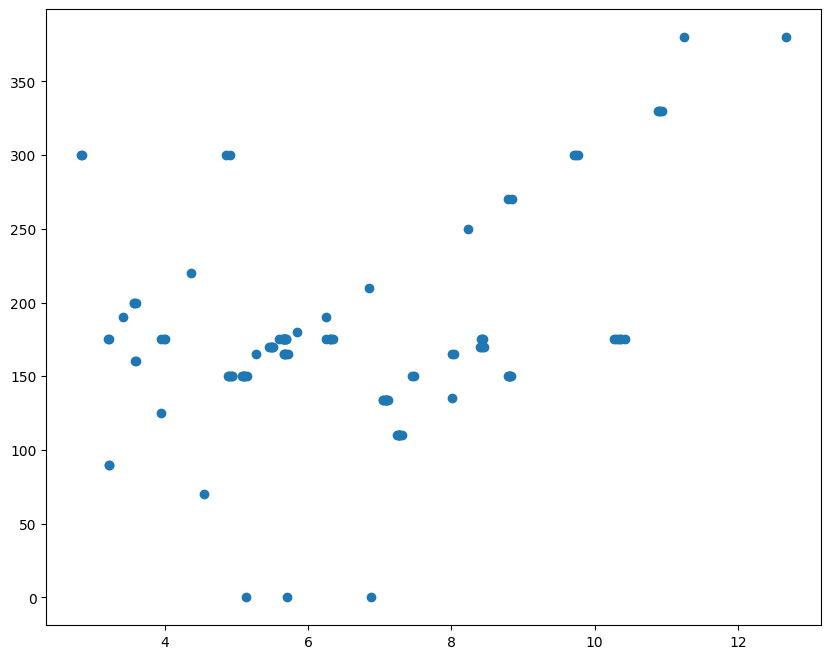

In [317]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(x,y)


**Insight:**
There is slight positive correlation but not significant so we can rule out that weight of the product impacts sales

In [320]:
customer_grp = df.groupby("LYLTY_CARD_NBR").aggregate({"TOT_SALES":"mean","LYLTY_CARD_NBR":"count"})
customer_grp.rename(columns={"LYLTY_CARD_NBR":"count"},inplace=True)

In [321]:
customer_grp.sort_values(by=["TOT_SALES","count"],inplace=True,ascending=False)
customer_grp.reset_index(inplace=True)

In [322]:
customer_grp.head(10)

,LYLTY_CARD_NBR,TOT_SALES,count
0,226000,650.0,2
1,44350,29.5,1
2,66014,28.5,1
3,154199,28.5,1
4,29093,27.0,1
5,36221,27.0,1
6,54225,27.0,1
7,60198,27.0,1
8,82189,27.0,1
9,149267,27.0,1


In [277]:
df[df['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


Customer 226000 has demonstrated some loyalty. He's made two purchases on separate dates, indicating consistent engagement.  His total sales value is the highest among our customers. Since both transactions were at the same store so he must be living near and also belongs to older premium families

<Axes: xlabel='TOT_SALES'>

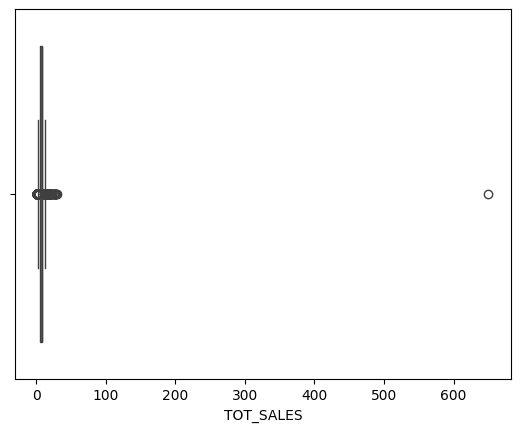

In [323]:
# Outlier check
import seaborn as sns
sns.boxplot(data=customer_grp,x="TOT_SALES")

<Axes: xlabel='TOT_SALES'>

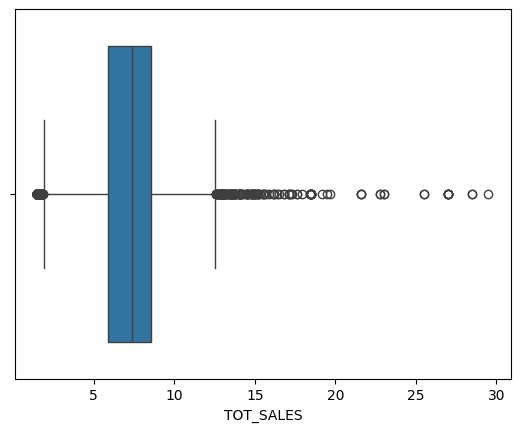

In [324]:
sns.boxplot(data=customer_grp.iloc[1:,:],x="TOT_SALES")

In [325]:
df["LIFESTAGE"].value_counts()

,count
LIFESTAGE,
OLDER SINGLES/COUPLES,54478
RETIREES,49763
OLDER FAMILIES,48596
YOUNG FAMILIES,43592
YOUNG SINGLES/COUPLES,36377
MIDAGE SINGLES/COUPLES,25110
NEW FAMILIES,6919


In [326]:
df["PREMIUM_CUSTOMER"].value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,101988
Budget,93157
Premium,69690


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'YOUNG SINGLES/COUPLES'),
  Text(1, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(2, 0, 'NEW FAMILIES'),
  Text(3, 0, 'OLDER FAMILIES'),
  Text(4, 0, 'OLDER SINGLES/COUPLES'),
  Text(5, 0, 'RETIREES'),
  Text(6, 0, 'YOUNG FAMILIES')])

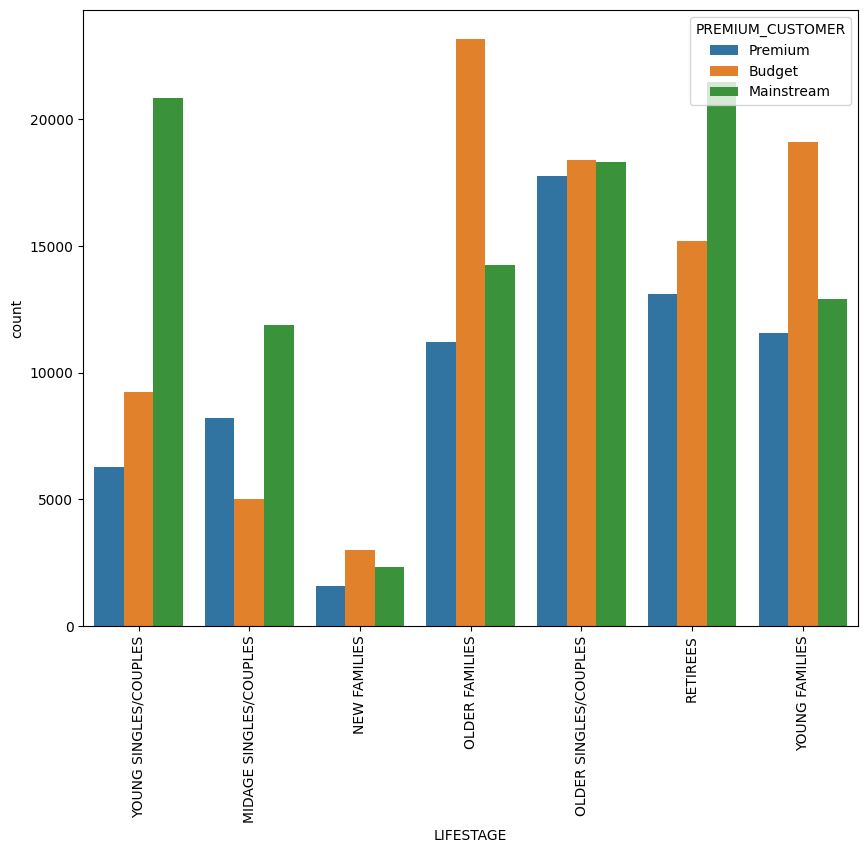

In [327]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="LIFESTAGE",hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=90)

Segment of Customers that visits most
1. Mainstream Young single couples
2. Old Families Budget
3. Retirees Mainstream
4. Young Families Budget

**Most Profitable Customer Segments:**

1. **Mid-age singles/couples (Mainstream)**: This segment exhibits the highest average total sales, making them the most lucrative customer group.

2. **Young singles/couples (Mainstream)**: Another high-performing segment, suggesting strong potential for marketing campaigns targeted at younger demographics.

3. **Retirees (Premium)**:While not as large as the other two, the premium retirees also demonstrate high profitability.


**Bestselling Products:**

The analysis identifies the top-selling products based on average total sales and total quantity sold.
1. Smiths Crnkle Chip Orgnl Big Bag 380g
2. Doritos Cheese Supreme 330g
3.	Smiths Crinkle Original 330g
4.	Cheezels Cheese 330g
5.	Smiths Crinkle Chips Salt & Vinegar 330g

**Loyal Customer Characteristics (Example: Customer 226000):**

* **High spending:** This customer has the highest average total sales.
* **Repeat purchases:**  Multiple transactions on separate dates suggest loyalty and consistent engagement.
* **Location proximity:**  Repeated purchases at the same store indicate that the customer likely lives nearby.
* **Older, premium customer segment:**  This customer might belong to an older, affluent demographic.

* **Customer Segment Visiting Most:**
    1. Mainstream Young single couples
    2. Old Families Budget
    3. Retirees Mainstream
    4. Young Families Budge

